In [1]:
import math
import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from chembl_webresource_client.new_client import new_client
import polars as pl

In [2]:
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity

In [3]:
EGFR_uniprot_id = "P00533"

In [4]:
targets_api.get(target_components_accession=EGFR_uniprot_id).only("target_chembl_id", "organism", "pref_name", "target_type")

[{'organism': 'Homo sapiens', 'pref_name': 'Maltase-glucoamylase', 'target_chembl_id': 'CHEMBL2074', 'target_type': 'SINGLE PROTEIN'}, {'organism': 'Homo sapiens', 'pref_name': 'Sulfonylurea receptor 2', 'target_chembl_id': 'CHEMBL1971', 'target_type': 'SINGLE PROTEIN'}, {'organism': 'Homo sapiens', 'pref_name': 'Phosphodiesterase 5A', 'target_chembl_id': 'CHEMBL1827', 'target_type': 'SINGLE PROTEIN'}, {'organism': 'Homo sapiens', 'pref_name': 'Voltage-gated T-type calcium channel alpha-1H subunit', 'target_chembl_id': 'CHEMBL1859', 'target_type': 'SINGLE PROTEIN'}, '...(remaining elements truncated)...']

In [5]:
EGFR_chembl_id = "CHEMBL203"

In [6]:
EGFR_bioactivity_raw = bioactivities_api.filter(
    target_chembl_id=EGFR_chembl_id, type="IC50", relation="=", assay_type="B"
).only(
    "activity_id",
    "assay_chembl_id",
    "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",
)

In [16]:
EGFR_bioactivity = pd.DataFrame.from_dict(EGFR_bioactivity_raw)

In [ ]:
# EGFR_bioactivity = EGFR_bioactivity_raw[["activity_id", "assay_chembl_id", "molecule_chembl_id", "type", "standard_units", "standard_value"]]

In [20]:
EGFR_bioactivity

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,32260,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL68920,=,nM,41.0,CHEMBL203,Homo sapiens,IC50,uM,0.041
1,32267,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL69960,=,nM,170.0,CHEMBL203,Homo sapiens,IC50,uM,0.17
2,32680,CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,CHEMBL137635,=,nM,9300.0,CHEMBL203,Homo sapiens,IC50,uM,9.3
3,32770,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL306988,=,nM,500000.0,CHEMBL203,Homo sapiens,IC50,uM,500.0
4,32772,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL66879,=,nM,3000000.0,CHEMBL203,Homo sapiens,IC50,uM,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11629,25755813,CHEMBL5446118,Affinity Biochemical interaction: (DELFIA/Time...,B,CHEMBL178654,=,nM,34.0,CHEMBL203,Homo sapiens,IC50,nM,34.0
11630,25755867,CHEMBL5446212,Affinity Biochemical interaction: (Radiometric...,B,CHEMBL554,=,nM,10.8,CHEMBL203,Homo sapiens,IC50,nM,10.8
11631,25776074,CHEMBL5468487,Selectivity interaction (Invitrogen SelectScre...,B,CHEMBL4091991,=,nM,4280.0,CHEMBL203,Homo sapiens,IC50,nM,4280.0
11632,25781094,CHEMBL5465728,Selectivity interaction (Kinase panel (enzymat...,B,CHEMBL483321,=,nM,6.4,CHEMBL203,Homo sapiens,IC50,nM,6.4


In [18]:
EGFR_bioactivity.shape

(11634, 13)

In [19]:
EGFR_bioactivity = EGFR_bioactivity.dropna(axis=0)
EGFR_bioactivity.shape

(11633, 13)

In [21]:
EGFR_bioactivity = EGFR_bioactivity.drop_duplicates("assay_chembl_id")
EGFR_bioactivity.shape

(1486, 13)

In [22]:
EGFR_bioactivity = EGFR_bioactivity[EGFR_bioactivity['standard_units'] == "nM"]
EGFR_bioactivity.shape

(1479, 13)

In [23]:
EGFR_bioactivity = EGFR_bioactivity[EGFR_bioactivity['type'] == "IC50"]
EGFR_bioactivity.shape

(1479, 13)

In [24]:
EGFR_bioactivity = EGFR_bioactivity.reset_index(drop=True)
EGFR_bioactivity.shape

(1479, 13)

In [25]:
EGFR_bioactivity.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,32260,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL68920,=,nM,41.0,CHEMBL203,Homo sapiens,IC50,uM,0.041
1,32680,CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,CHEMBL137635,=,nM,9300.0,CHEMBL203,Homo sapiens,IC50,uM,9.3
2,32770,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL306988,=,nM,500000.0,CHEMBL203,Homo sapiens,IC50,uM,500.0
3,62149,CHEMBL679674,Inhibition of Epidermal growth factor receptor,B,CHEMBL47940,=,nM,3200.0,CHEMBL203,Homo sapiens,IC50,uM,3.2
4,78012,CHEMBL679949,Evaluated for inhibitory activity towards tyro...,B,CHEMBL432941,=,nM,8880.0,CHEMBL203,Homo sapiens,IC50,uM,8.88


In [28]:
EGFR_molecules = compounds_api.get(target_chembl_id="CHEMBL203")

In [29]:
# Get list of molecule chembl ids from EGFR_bioactivity
molecule_ids = EGFR_bioactivity['molecule_chembl_id'].tolist()

# Filter the EGFR_molecules to only include those molecules
EGFR_molecules = compounds_api.filter(molecule_chembl_id__in=molecule_ids).only("molecule_chembl_id", "molecule_structures")

In [30]:
# Convert EGFR_molecules to a DataFrame
EGFR_molecules_df = pd.DataFrame(list(EGFR_molecules))

# Merge EGFR_bioactivity with EGFR_molecules_df based on molecule_chembl_id
EGFR_combined = pd.merge(
    EGFR_bioactivity,
    EGFR_molecules_df,
    on="molecule_chembl_id",
    how="inner"
)

# Drop duplicates
EGFR_combined = EGFR_combined.drop_duplicates("molecule_chembl_id").reset_index(drop=True)

# Display the first few rows of the joined dataframe
EGFR_combined

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value,molecule_structures
0,32260,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL68920,=,nM,41.0,CHEMBL203,Homo sapiens,IC50,uM,0.041,{'canonical_smiles': 'Cc1cc(C)c(/C=C2\C(=O)Nc3...
1,32680,CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,CHEMBL137635,=,nM,9300.0,CHEMBL203,Homo sapiens,IC50,uM,9.3,{'canonical_smiles': 'CN(c1ccccc1)c1ncnc2ccc(N...
2,32770,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL306988,=,nM,500000.0,CHEMBL203,Homo sapiens,IC50,uM,500.0,{'canonical_smiles': 'CC(=C(C#N)C#N)c1ccc(NC(=...
3,62149,CHEMBL679674,Inhibition of Epidermal growth factor receptor,B,CHEMBL47940,=,nM,3200.0,CHEMBL203,Homo sapiens,IC50,uM,3.2,{'canonical_smiles': 'Nc1ncnc2c1c(-c1ccc(Oc3cc...
4,78012,CHEMBL679949,Evaluated for inhibitory activity towards tyro...,B,CHEMBL432941,=,nM,8880.0,CHEMBL203,Homo sapiens,IC50,uM,8.88,{'canonical_smiles': 'COc1cccc(-c2ccc3c(c2)NC(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,25705893,CHEMBL5386729,Inhibition of EGFR L858R/T790M mutant (unknown...,B,CHEMBL5408255,=,nM,152.0,CHEMBL203,Homo sapiens,IC50,nM,152.0,{'canonical_smiles': 'CCOC(=O)c1c(-n2ccnc2)nc2...
858,25706001,CHEMBL5386735,Inhibition of EGFR (unknown origin),B,CHEMBL5206476,=,nM,5300000.0,CHEMBL203,Homo sapiens,IC50,mM,5.3,{'canonical_smiles': 'O=C1c2ccccc2CN1C(c1nc(=O...
859,25706594,CHEMBL5386905,Inhibition of recombinant EGFR (unknown origin...,B,CHEMBL5398753,=,nM,98.0,CHEMBL203,Homo sapiens,IC50,nM,98.0,{'canonical_smiles': 'O=C(CSc1nc2ccccc2c(=O)n1...
860,25755813,CHEMBL5446118,Affinity Biochemical interaction: (DELFIA/Time...,B,CHEMBL178654,=,nM,34.0,CHEMBL203,Homo sapiens,IC50,nM,34.0,{'canonical_smiles': 'CCOc1cc2ncc(C#N)c(Nc3ccc...


In [31]:
EGFR_combined['canonical smiles'] = EGFR_combined['molecule_structures'].apply(
    lambda x: x.get('canonical_smiles') if isinstance(x, dict) else None
)

In [32]:
EGFR_combined = EGFR_combined.drop('molecule_structures', axis=1)

In [33]:
# Rename standard_value to IC50
EGFR_bioactivity = EGFR_bioactivity.rename(columns={'standard_value': 'IC50'})

# Calculate pIC50 = -log10(IC50)
EGFR_bioactivity['pIC50'] = -np.log10(EGFR_bioactivity['IC50'].astype(float) / 1_000_000_000)  # Convert from nM to M before taking log

# Drop duplicates
EGFR_bioactivity = EGFR_bioactivity.drop_duplicates("molecule_chembl_id").reset_index(drop=True)

# Display the first few rows to verify
EGFR_bioactivity

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,IC50,target_chembl_id,target_organism,type,units,value,pIC50
0,32260,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL68920,=,nM,41.0,CHEMBL203,Homo sapiens,IC50,uM,0.041,7.387216
1,32680,CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,CHEMBL137635,=,nM,9300.0,CHEMBL203,Homo sapiens,IC50,uM,9.3,5.031517
2,32770,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL306988,=,nM,500000.0,CHEMBL203,Homo sapiens,IC50,uM,500.0,3.301030
3,62149,CHEMBL679674,Inhibition of Epidermal growth factor receptor,B,CHEMBL47940,=,nM,3200.0,CHEMBL203,Homo sapiens,IC50,uM,3.2,5.494850
4,78012,CHEMBL679949,Evaluated for inhibitory activity towards tyro...,B,CHEMBL432941,=,nM,8880.0,CHEMBL203,Homo sapiens,IC50,uM,8.88,5.051587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,25705893,CHEMBL5386729,Inhibition of EGFR L858R/T790M mutant (unknown...,B,CHEMBL5408255,=,nM,152.0,CHEMBL203,Homo sapiens,IC50,nM,152.0,6.818156
858,25706001,CHEMBL5386735,Inhibition of EGFR (unknown origin),B,CHEMBL5206476,=,nM,5300000.0,CHEMBL203,Homo sapiens,IC50,mM,5.3,2.275724
859,25706594,CHEMBL5386905,Inhibition of recombinant EGFR (unknown origin...,B,CHEMBL5398753,=,nM,98.0,CHEMBL203,Homo sapiens,IC50,nM,98.0,7.008774
860,25755813,CHEMBL5446118,Affinity Biochemical interaction: (DELFIA/Time...,B,CHEMBL178654,=,nM,34.0,CHEMBL203,Homo sapiens,IC50,nM,34.0,7.468521


In [45]:
EGFR_combined['pIC50'] = EGFR_bioactivity['pIC50']

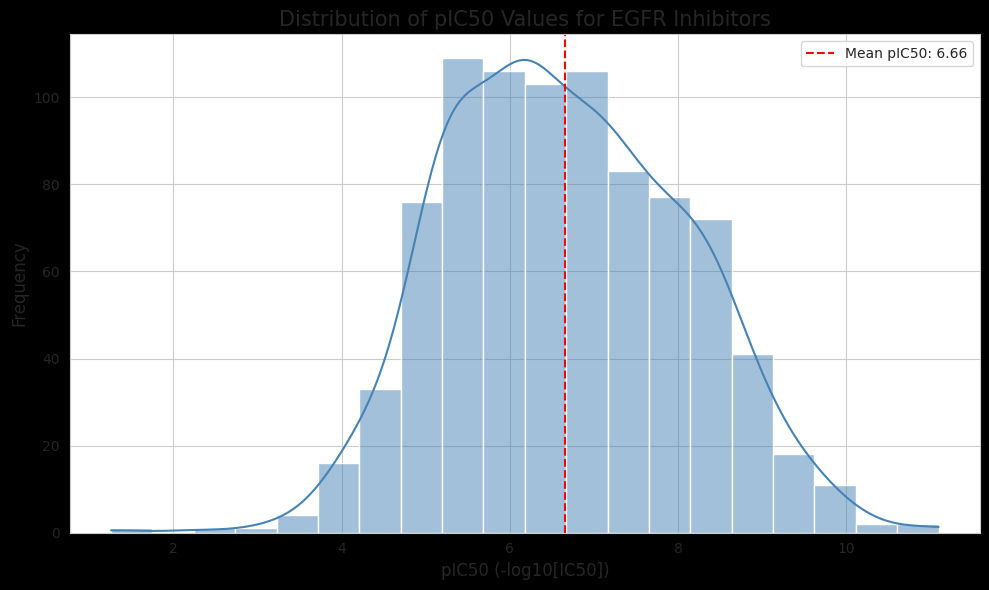

In [34]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set style for the plot
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Create histogram of pIC50 values
sns.histplot(data=EGFR_bioactivity, x='pIC50', bins=20, kde=True, color='steelblue')

# Add title and labels
plt.title('Distribution of pIC50 Values for EGFR Inhibitors', fontsize=15)
plt.xlabel('pIC50 (-log10[IC50])', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add vertical line at mean
mean_pIC50 = EGFR_bioactivity['pIC50'].mean()
plt.axvline(x=mean_pIC50, color='red', linestyle='--', 
            label=f'Mean pIC50: {mean_pIC50:.2f}')

plt.legend()
plt.tight_layout()
plt.show()

In [35]:
# Get the top 3 compounds with highest pIC50 values
top3_compounds = EGFR_bioactivity.sort_values('pIC50', ascending=False).head(3)

# Create a DataFrame for display with RDKit
top3_display = pd.merge(
    top3_compounds,
    EGFR_molecules_df,
    on="molecule_chembl_id",
    how="inner"
)

# Convert the DataFrame to an RDKit dataframe with molecular structures
display_df = top3_display.copy()
# Extract the SMILES from the molecule_structures dictionary column
display_df['smiles'] = display_df['molecule_structures'].apply(
    lambda x: x['canonical_smiles'] if isinstance(x, dict) and 'canonical_smiles' in x else None
)

# Use RDKit to add molecular structures
PandasTools.AddMoleculeColumnToFrame(display_df, 'smiles', 'Molecule')

# Display the DataFrame with structures, pIC50 values, and other relevant info
display_df[['Molecule', 'molecule_chembl_id', 'IC50', 'pIC50']]

,Molecule,molecule_chembl_id,IC50,pIC50
0,<rdkit.Chem.rdchem.Mol object at 0x7666ab415f50>,CHEMBL5270693,0.008,11.096910
1,<rdkit.Chem.rdchem.Mol object at 0x7666ab415d20>,CHEMBL53753,0.008,11.096910
2,<rdkit.Chem.rdchem.Mol object at 0x7666ab415d90>,CHEMBL29197,0.029,10.537602


In [36]:
from rdkit.Chem import Draw

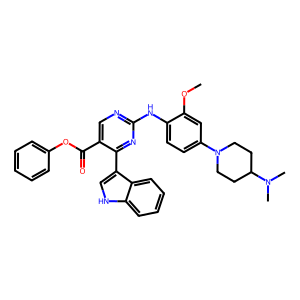

In [37]:
Draw.MolToImage(display_df['Molecule'][0])

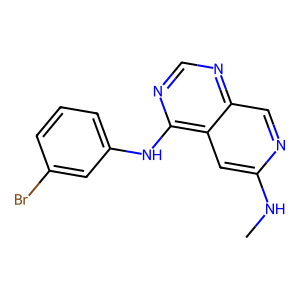

In [38]:
Draw.MolToImage(display_df['Molecule'][1])

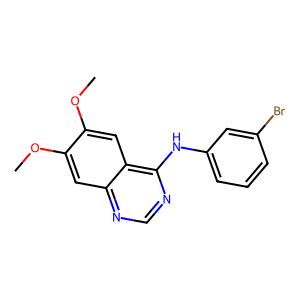

In [39]:
Draw.MolToImage(display_df['Molecule'][2])

In [46]:
EGFR_combined.to_csv("EGFR_combined.csv", index=False)